In [41]:
import sys
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import h5py

sys.path.insert(0,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )
from rdkit import Chem

sys.path.insert(1,'/global/homes/b/bpb/metaiq/')
# import frag_molecule as frag
import generate_frag_dag as frag

from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
DrawingOptions.includeAtomNumbers=True
DrawingOptions.bondLineWidth=1.8
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


%matplotlib notebook
#sys.path.insert(0,'/global/homes/b/bpb/metaiq/')
#%import score_frag_dag as sfg

In [2]:
path = '/project/projectdirs/openmsi/projects/ben_trees/'
tree_files = glob.glob(os.path.join(path,'*.h5'))

In [4]:

isotope_file = '/global/homes/b/bpb/metaiq/pactolus/max_abundance_isotopes.csv'
isotope_dict = frag.get_isotope_dict(isotope_file)


In [11]:
#inchi = 'InChI=1S/C2H7NO/c3-1-2-4/h4H,1-3H2' #ethanolamine
inchi = 'InChI=1S/C3H9N/c1-2-3-4/h2-4H2,1H3' #propylamine
# inchi = 'InChI=1S/C12H27N/c1-2-3-4-5-6-7-8-9-10-11-12-13/h2-13H2,1H3' #dodecylamine
# inchi = 'InChI=1S/C5H14NO/c1-6(2,3)4-5-7/h7H,4-5H2,1-3H3/q+1' #choline
# inchi = 'InChI=1S/C4H12N/c1-5(2,3)4/h1-4H3/q+1' #tetramethylammonium
#inchi = 'InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2/h2-11H,1H2/t2-,3-,4+,5-,6?/m1/s1' #glucose
#baumin
# inchi = 'InChI=1S/C27H22O11/c1-36-23(34)12-16-11-21(32)24(26(37-16)14-4-7-18(29)20(31)9-14)25-22(33)10-15(38-27(25)35)5-2-13-3-6-17(28)19(30)8-13/h2-11,24,26,28-31,33H,12H2,1H3/b5-2+/t24-,26-/m1/s1'
mol = Chem.MolFromInchi(inchi)

frag = reload(frag)
f_tree = frag.FragTree(mol,isotope_dict,50)
print len(f_tree.fragment_dict.items())
for k,v in f_tree.fragment_dict.items():
    print k,v

10
(0, 4, 5, 6) {'path': (0,), 'mass': 15.023475095999999, 'parent': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)}
(2, 3, 9, 10, 11, 12) {'path': (1,), 'mass': 30.034374127999996, 'parent': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)}
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10) {'path': (2,), 'mass': 43.054775224, 'parent': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)}
(0, 1, 4, 5, 6, 7, 8) {'path': (1,), 'mass': 29.039125159999998, 'parent': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)}
(3, 11, 12) {'path': (2,), 'mass': 16.018724064, 'parent': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)}
(1, 2, 7, 8, 9, 10) {'path': (0, 2), 'mass': 28.031300127999998, 'parent': (1, 2, 3, 7, 8, 9, 10, 11, 12)}
(1, 7, 8) {'path': (0, 1), 'mass': 14.015650063999999, 'parent': (1, 2, 3, 7, 8, 9, 10, 11, 12)}
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12) {'path': (), 'mass': 59.073499287999994, 'parent': None}
(2, 9, 10) {'path': (1, 2), 'mass': 14.015650063999999, 'parent': (2, 3, 9, 10, 11, 12)}
(1, 2, 3, 7, 8, 9, 10, 11, 12)

13


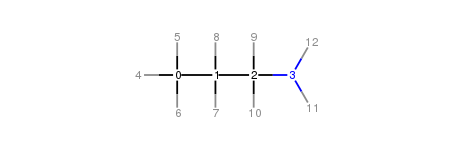

In [73]:
wm = Chem.RWMol(Chem.AddHs(mol))
num_atoms = wm.GetNumAtoms()
print num_atoms
wm


In [80]:
frags = []
# for k,v in f_tree.fragment_dict.items():
k,v = f_tree.fragment_dict.items()[0]
print k
mol_hs = Chem.AddHs(mol)
atoms_to_remove = list(set(range(num_atoms)) - set(k))
print atoms_to_remove
heavy_atoms_to_remove = [idx for idx in atoms_to_remove if mol_hs.GetAtomWithIdx(idx).GetAtomicNum() > 1]
wm = Chem.RWMol(mol)
print heavy_atoms_to_remove
for atom_idx in heavy_atoms_to_remove:
    wm.RemoveAtom(atom_idx)
#     frags.append(wm)
#     print atom_idx
wm
# Draw.MolsToGridImage(frags,molsPerRow=7,useSVG=True)

(0, 4, 5, 6)
[1, 2, 3, 7, 8, 9, 10, 11, 12]
[1, 2, 3]


RuntimeError: Range Error
	idx
	Violation occurred on line 155 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 3 <= 1
	RDKIT: 2016.03.1
	BOOST: 1_56


In [ ]:

# ethanolamine_file = [f for f in tree_files if 'HZAXFHJVJLSVMW-UHFFFAOYSA-N' in f][-1]
# ethanolamine_file

In [ ]:
# tree_file = h5py.File(ethanolamine_file,'r')
# tree_list = tree_file[tree_file.keys()[0]]
# tree = tree_list[tree_list.keys()[0]]
# print tree.dtype
# print 
# for i,t in enumerate(tree):
#     for s in t:
#         print i,s
#     print

### each row is a compound structure
* inchi_key
* is it in metatlas
* is a tree made to a depth of 5
* inchi_key has exact chembl preferred name & synonyms
* inchi_key has exact pubchem synonyms
* partial inchi_key has pubchem synonyms
* is a job submitted to build the tree


## fields to add to metatlas db
* path to tree file
* prefered name from chembl
* full inchikey synonyms from chembl
* full inchikey synonyms from pubchem
* partial inchikey synonyms from pubchem
* partial inchikey pubchem cid
* inchikey pubchem cid

## submit inchi list to nersc
* trees that are not built need to be built
* small trees are fast
* large trees take 10 minutes to days
* once they are built register their location in the database
* some structures can't be built for various reasons

## stop-gap plan
* add location of tree to database
* all trees must be in database
* not all database compound have trees

## store complete fragmentation of trees
* store all unique fragments
* store parent child relationship for each fragment
* at some point generating fragment is faster than storing
* only store immediate relationship between fragment
* each fragment has an id
* store a table linking parent and child